# Logistic regression

In [46]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Sigmoid 함수

$$y=\frac{1}{1 + \text{exp}{(-x)}}$$

[-10, 10, -0.1, 1.1]

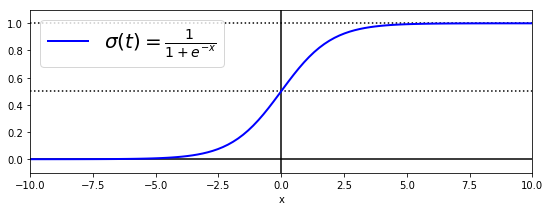

In [47]:
# Sigmoid 함수를 그리는 방법

# x 범위를 -10 ~ 10까지로 합니다.
x = np.linspace(-10, 10, 100)

# y 값
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")  # x 축
plt.plot([-10, 10], [0.5, 0.5], "k:")  # y = 0.5 직선
plt.plot([-10, 10], [1, 1], "k:")  # y = 1 직선
plt.plot([0, 0], [-1.1, 1.1], "k-")  # y 축
plt.plot(x, y, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-x}}$")  # Sigmoid 곡선
plt.xlabel("x")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

## 2. 독일 신용 평가 데이터를 이용하여 돈을 갚을 수 있는지의 여부를 결정하는 분류기를 만들자.

In [48]:
import pandas as pd

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=1000000

## (1) 데이터 로딩

In [49]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)

In [50]:
print(dataset.shape)
dataset.head()

(1000, 21)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [51]:
COL = [
    'Status_of_existing_checking_account', 
    'Duration_in_month',
    'Credit_history',
    'Purpose', 
    'Credit_amount', 
    'Savings_account_bonds', 
    'Present_employment_since', 
    'Installment_rate_in_percentage_of_disposable_income',
    'Personal_status_and_sex',
    'Other_debtors_guarantors',
    'Present_residence_since', 
    'Property', 
    'Age_in_years', 
    'Other_installment_plans', 
    'Housing',
    'Number_of_existing_credits_at_this_bank',
    'Job',
    'Number_of_people_being_liable_to_provide_maintenance_for',
    'Telephone',
    'foreign_worker',
    'Target'
]

In [52]:
dataset.columns = COL
dataset.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [53]:
# Target value를 0,1로 바꾸자.
dataset['Target'] = dataset['Target'] - 1

In [54]:
dataset['Target'].head()

0    0
1    1
2    0
3    0
4    1
Name: Target, dtype: int64

## (2) Train set과 test set을 나누기

In [55]:
# 2.3 : 1 정도는 imbalance 인가?
dataset.Target.value_counts()

0    700
1    300
Name: Target, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)

In [58]:
# 학습셋에서 비율 확인
train_set.Target.value_counts()

0    491
1    209
Name: Target, dtype: int64

In [59]:
# 테스트셋에서 비율 확인
test_set.Target.value_counts()

0    209
1     91
Name: Target, dtype: int64

## (3) Numerical column과 Categorical column 나누기

In [60]:
dataset.dtypes

Status_of_existing_checking_account                         object
Duration_in_month                                            int64
Credit_history                                              object
Purpose                                                     object
Credit_amount                                                int64
Savings_account_bonds                                       object
Present_employment_since                                    object
Installment_rate_in_percentage_of_disposable_income          int64
Personal_status_and_sex                                     object
Other_debtors_guarantors                                    object
Present_residence_since                                      int64
Property                                                    object
Age_in_years                                                 int64
Other_installment_plans                                     object
Housing                                                     ob

In [61]:
num_features = []
cate_features = []
for feat in dataset.columns:
    if dataset[feat].dtype == 'object':
        cate_features.append(feat)
    elif feat != 'Target':
        num_features.append(feat)

In [62]:
num_features

['Duration_in_month',
 'Credit_amount',
 'Installment_rate_in_percentage_of_disposable_income',
 'Present_residence_since',
 'Age_in_years',
 'Number_of_existing_credits_at_this_bank',
 'Number_of_people_being_liable_to_provide_maintenance_for']

In [63]:
cate_features

['Status_of_existing_checking_account',
 'Credit_history',
 'Purpose',
 'Savings_account_bonds',
 'Present_employment_since',
 'Personal_status_and_sex',
 'Other_debtors_guarantors',
 'Property',
 'Other_installment_plans',
 'Housing',
 'Job',
 'Telephone',
 'foreign_worker']

Numerical feature는 **standardization** 또는 **normalization** 을 한다.

In [64]:
# Minmax를 선택하겠다. 왜?
from sklearn.preprocessing import MinMaxScaler

In [65]:
# Null 값 체크
train_set[num_features].describe()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,21.252857,3406.815714,2.981429,2.834286,35.492857,1.420000,1.137143
std,11.900051,2971.897408,1.118679,1.103238,11.253037,0.581695,0.344244
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1381.750000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4226.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [66]:
scaler = MinMaxScaler()
scaler.fit(train_set[num_features])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
train_scaled_num_features = scaler.transform(train_set[num_features])
test_scaled_num_features = scaler.transform(test_set[num_features])

---

`align` 동작법

In [68]:
# align 작동법
df1 = pd.DataFrame([[1,2,3,4], [6,7,8,9]], columns=['D', 'B', 'E', 'A'], index=[1,2])
df2 = pd.DataFrame([[10,20,30,40], [60,70,80,90], [600,700,800,900]], columns=['A', 'B', 'C', 'D'], index=[2,3,4])

display(df1)
display(df2)

a1, a2 = df1.align(df2, join='outer', axis=1)
display(a1)
display(a2)

,D,B,E,A
1,1,2,3,4
2,6,7,8,9


,A,B,C,D
2,10,20,30,40
3,60,70,80,90
4,600,700,800,900


,A,B,C,D,E
1,4,2,NaN,1,3
2,9,7,NaN,6,8


,A,B,C,D,E
2,10,20,30,40,NaN
3,60,70,80,90,NaN
4,600,700,800,900,NaN


---

In [69]:
train_cat_features = pd.get_dummies(train_set[cate_features])
print(train_cat_features.shape)
train_cat_features.head(1)

(700, 54)


,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_account_bonds_A61,Savings_account_bonds_A62,Savings_account_bonds_A63,Savings_account_bonds_A64,Savings_account_bonds_A65,Present_employment_since_A71,Present_employment_since_A72,Present_employment_since_A73,Present_employment_since_A74,Present_employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_guarantors_A101,Other_debtors_guarantors_A102,Other_debtors_guarantors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign_worker_A201,foreign_worker_A202
541,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0


In [70]:
test_cat_features = pd.get_dummies(test_set[cate_features])
print(test_cat_features.shape)
test_cat_features.head(1)

(300, 54)


,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_account_bonds_A61,Savings_account_bonds_A62,Savings_account_bonds_A63,Savings_account_bonds_A64,Savings_account_bonds_A65,Present_employment_since_A71,Present_employment_since_A72,Present_employment_since_A73,Present_employment_since_A74,Present_employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_guarantors_A101,Other_debtors_guarantors_A102,Other_debtors_guarantors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign_worker_A201,foreign_worker_A202
521,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [73]:
train_cat_features, test_cat_features = \
    train_cat_features.align(test_cat_features, join='outer', axis=1, fill_value=0)

In [74]:
print(train_cat_features.shape)
print(test_cat_features.shape)

(700, 54)
(300, 54)


- Categorycal, numeric feature들을 연결하여 하나의 feature를 생성합니다.
- Target value를 분리합니다.

In [75]:
train_x = np.c_[train_scaled_num_features, train_cat_features]
test_x = np.c_[test_scaled_num_features, test_cat_features]
train_y = train_set['Target']
test_y = test_set['Target']
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(700, 61)
(300, 61)
(700,)
(300,)


In [77]:
train_x[0]

array([0.35714286, 0.09805216, 1.        , 1.        , 0.73214286,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        ])

## (4) 학습

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logistic = LogisticRegression(random_state=42)

Cross validation을 이용하여 학습을 진행하며, 성능을 측정합니다.

https://scikit-learn.org/stable/modules/cross_validation.html

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic, train_x, train_y, cv=3, scoring='accuracy')

array([0.72649573, 0.70940171, 0.74137931])

### Precision, recall

In [96]:
from sklearn.model_selection import cross_val_predict

pred_train_y = cross_val_predict(logistic, train_x, train_y, cv=3)

In [97]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(train_y, pred_train_y)
recall = recall_score(train_y, pred_train_y)
print('Precision :', precision)
print('Recall :', recall)

Precision : 0.5548387096774193
Recall : 0.41148325358851673


Precision, recall 그래프를 그립니다. Binary logistic의 경우는 0 또는 1의 확률값이 나오고, 그 중에서 높은 값을 취하게 됩니다. 따라서 1의 확률이 0.5보다 크면 1로 분류되고 아니면 0으로 분류됩니다. `predict_proba`를 이용하여 1이 될 확률을 얻습니다.

In [98]:
y_scores = cross_val_predict(logistic, train_x, train_y, cv=3, method='predict_proba') 

In [88]:
y_scores[:5]

array([[0.76614072, 0.23385928],
       [0.86179925, 0.13820075],
       [0.61978265, 0.38021735],
       [0.89528968, 0.10471032],
       [0.97188711, 0.02811289]])

In [99]:
from sklearn.metrics import precision_recall_curve

# 1의 확률만 넣기 위하여 y_scores[:, 1]를 사용합니다.
precisions, recalls, thresholds = precision_recall_curve(train_y, y_scores[:,1])

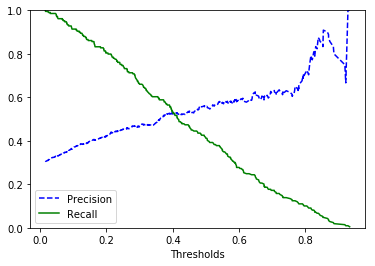

In [102]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='lower left')
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## (5) Test set에서의 검증

In [138]:
logistic.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [140]:
accuracy = accuracy_score(logistic.predict(test_x), test_y)
print('Accuracy :', accuracy)

Accuracy : 0.8222222222222222


In [111]:
print(classification_report(test_y, logistic.predict(test_x)))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       209
          1       0.68      0.49      0.57        91

avg / total       0.77      0.78      0.77       300



In [117]:
pd.crosstab(logistic.predict(test_x), test_y, 
            rownames=['Predict'], colnames=['Actual'], margins=True)

Actual,0,1,All
Predict,,,
0,188,46,234
1,21,45,66
All,209,91,300


돈을 잘 갚을 사람(0)을 잘못 예측하여 돈을 잘 못 갚을 것으로 판단하는 것이, 돈을 못 갚을 사람(1)을 잘못 예측하여 돈을 잘 갚을 것으로 판단하는 것보다 낫다.

(0)를 예측하는 것보다는 (1)을 예측하는 것이 더 낫다.

즉 (1)에 대한 recall은 높아도 된다. 하지만 (0)에 대한 precision이 높아야 한다.

---

만약 thresholds를 변경하여 결과를 도출하고 싶다면? 결과를 커스터마이징을 해야한다. 이것을 위해서는 `predict_proba`를 사용한다.

In [118]:
logistic.predict_proba(test_x)[:10]

array([[0.61709307, 0.38290693],
       [0.47697571, 0.52302429],
       [0.35372188, 0.64627812],
       [0.72407789, 0.27592211],
       [0.95136662, 0.04863338],
       [0.63651175, 0.36348825],
       [0.94065189, 0.05934811],
       [0.58302568, 0.41697432],
       [0.95661977, 0.04338023],
       [0.95749706, 0.04250294]])

In [119]:
# 1이 될 확률만 가지고 계산을 하면 된다.
logistic.predict_proba(test_x)[:,1][:10]

array([0.38290693, 0.52302429, 0.64627812, 0.27592211, 0.04863338,
       0.36348825, 0.05934811, 0.41697432, 0.04338023, 0.04250294])

In [120]:
# Threshold 0.3보다 크면 1로 분류한다. : Recall을 상승
logistic.predict_proba(test_x)[:,1][:10] > 0.3

array([ True,  True,  True, False, False,  True, False,  True, False,
       False])

In [121]:
# 실제 결과와 비교해보자!
logistic.predict(test_x)[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Softmax regressor

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다. 이를 소프트맥스 회귀(Softmax regression) 또는 다항 로지스틱 회귀(Multinomial Logistic Regression)이라고 한다.

샘플 $x$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수 $s_k(x)$를 계산하고, 그 점수에 소프트맥스 함수(softmax function) 또는 정규화된 지수함수를 적용하여 각 클래스의 확률을 추정한다. ($K$ : 클래스 수)

 - 클래스 $k$에 대한 소프트맥스 점수 : $s_k(x)=(\theta^{(k)})^Tx$
 - 소프트맥스 함수 : $\hat{p}_k=\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$
     
- Cost function : $J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

- Equation for the gradients : $\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

## (1)  데이터 로딩

In [163]:
from sklearn import datasets
iris = datasets.load_iris()

# 데이터셋의 내부구조를 보려면..
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [164]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

## (2) 학습셋과 테스트셋 구분

In [165]:
# Softmax classifier의 동작을 살펴보기 위하여, scaling은 우선 무시 (데이터의 양도 적다.)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=42)

In [166]:
train_x[:3]

array([[3.7, 1. ],
       [5.1, 1.5],
       [5.5, 1.8]])

In [167]:
train_y[:3]

array([1, 2, 2])

## (3) Softmax classifier 학습

In [168]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(train_x, train_y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## (4 )정확도 측정

학습 셋에서의 정확도를 살펴보자.

In [169]:
accuracy_score(train_y, softmax_reg.predict(train_x))

0.9523809523809523

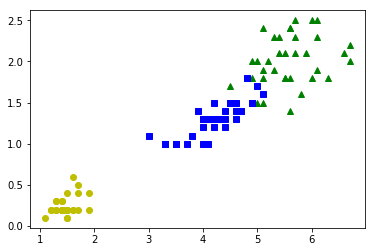

In [170]:
plt.plot(train_x[train_y==2, 0], train_x[train_y==2, 1], "g^", label="Iris-Virginica")
plt.plot(train_x[train_y==1, 0], train_x[train_y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(train_x[train_y==0, 0], train_x[train_y==0, 1], "yo", label="Iris-Setosa")

테스트 셋에서의 정확도를 살펴보자.

In [172]:
accuracy_score(test_y, softmax_reg.predict(test_x))

1.0

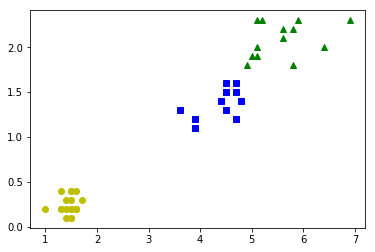

In [175]:
plt.plot(test_x[test_y==2, 0], test_x[test_y==2, 1], "g^", label="Iris-Virginica")
plt.plot(test_x[test_y==1, 0], test_x[test_y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(test_x[test_y==0, 0], test_x[test_y==0, 1], "yo", label="Iris-Setosa")

## <font color=red>(5) Desicion function for softmax regression</font>

학습 셋의 샘플 1개를 가지고 테스트를 해보자.

In [176]:
sample = train_x[0]
sample

array([3.7, 1. ])

In [177]:
print('Sample이 속한 클래스 :', train_y[0])

Sample이 속한 클래스 : 1


> 각 클래스의 파라미터 : $\Theta^{(k)}$

In [178]:
softmax_reg.coef_

array([[-4.20708644, -2.04246871],
       [ 0.25446021, -1.75720986],
       [ 3.95262623,  3.79967857]])

In [183]:
class_0_theta = softmax_reg.coef_[0]
class_1_theta = softmax_reg.coef_[1]
class_2_theta = softmax_reg.coef_[2]

In [184]:
softmax_reg.intercept_

array([ 16.88144597,   5.11998802, -22.00143398])

> 소프트맥스 점수 : $s_k(x)=(\Theta^{(k)})^Tx$ ($\Theta$의 shape에 맞추어 transpose를 쓰거나 쓰지 않지만, 결국 벡터내적을 의미한다.)

In [185]:
a = np.dot(class_0_theta, sample) + softmax_reg.intercept_[0]
b = np.dot(class_1_theta, sample) + softmax_reg.intercept_[1]
c = np.dot(class_2_theta, sample) + softmax_reg.intercept_[2]

In [186]:
print('첫번째 클래스의 소프트맥스 점수 :', a)
print('두번째 클래스의 소프트맥스 점수 :', b)
print('세번째 클래스의 소프트맥스 점수 :', c)

첫번째 클래스의 소프트맥스 점수 : -0.7272425720711553
두번째 클래스의 소프트맥스 점수 : 4.304280943371801
세번째 클래스의 소프트맥스 점수 : -3.5770383713003326


In [190]:
# Softmax classifier에서 해당값을 찾아볼수 있다.
softmax_reg.decision_function(train_x)[0]

array([-0.72724257,  4.30428094, -3.57703837])

>  - 소프트맥스 함수 : $\hat{p}_k=\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [66]:
# 직접 구해보는 것
print('첫번째 클래스의 소프트맥스 값 :', np.exp(a) / (np.exp(a) + np.exp(b) + np.exp(c)))
print('두번째 클래스의 소프트맥스 값 :', np.exp(b) / (np.exp(a) + np.exp(b) + np.exp(c)))
print('세번째 클래스의 소프트맥스 값 :', np.exp(c) / (np.exp(a) + np.exp(b) + np.exp(c)))

첫번째 클래스의 소프트맥스 값 : 0.006484073336769845
두번째 클래스의 소프트맥스 값 : 0.9931407832478082
세번째 클래스의 소프트맥스 값 : 0.00037514341542191733


In [67]:
# 소프트맥스 클래스를 호출
from sklearn.utils.extmath import softmax
softmax([[a, b, c]])

array([[6.48407334e-03, 9.93140783e-01, 3.75143415e-04]])

In [68]:
# Softmax classifier에서 해당값을 찾아볼수 있다.
softmax_reg.predict_proba(train_x)[0]

array([6.48407334e-03, 9.93140783e-01, 3.75143415e-04])